# Handwritten digits classification using neural network


In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:

X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

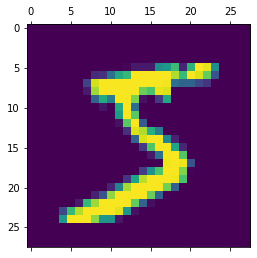

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [13]:
X_train_flattened.shape


(60000, 784)

In [14]:
X_train_flattened[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4856 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3056 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2857 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2747 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2675 - accuracy: 0.9265


In [16]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 0s 936us/step - loss: 0.2688 - accuracy: 0.9258


[0.2687705159187317, 0.9258000254631042]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([9.7854627e-06, 9.7673508e-11, 3.6500121e-05, 9.2414320e-03,
       8.3871890e-07, 5.9509708e-05, 1.5308315e-09, 7.1440601e-01,
       4.9087997e-05, 1.1321604e-03], dtype=float32)

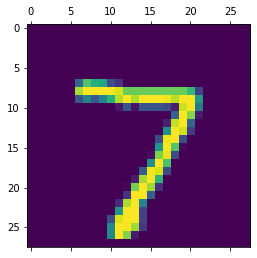

In [18]:
plt.matshow(X_test[0])


In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [21]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    1,    2,    0,    8,   12,    3,    2,    0],
       [   0, 1111,    4,    2,    0,    1,    4,    2,   11,    0],
       [   3,    6,  931,   21,    6,    5,   13,   10,   30,    7],
       [   1,    0,   20,  939,    0,   13,    2,   10,   14,   11],
       [   1,    1,    4,    1,  900,    0,   13,    4,    8,   50],
       [   7,    2,    2,   46,   10,  766,   18,    5,   27,    9],
       [   6,    3,    3,    1,    7,   11,  923,    2,    2,    0],
       [   1,    7,   23,   10,    6,    0,    0,  931,    1,   49],
       [   5,    6,    7,   27,    9,   24,    9,   10,  860,   17],
       [   8,    6,    1,   11,   16,    5,    1,   11,    5,  945]])>

Text(69.0, 0.5, 'Truth')

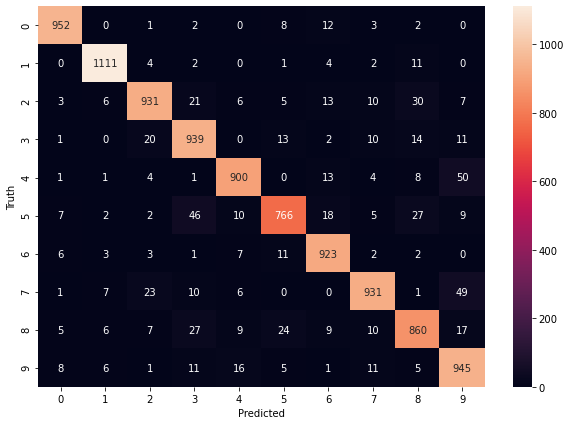

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [26]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2904 - accuracy: 0.9190
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1354 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0973 - accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0745 - accuracy: 0.9780
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9822


In [27]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0860 - accuracy: 0.9732


[0.08595281839370728, 0.9732000231742859]

Text(69.0, 0.5, 'Truth')

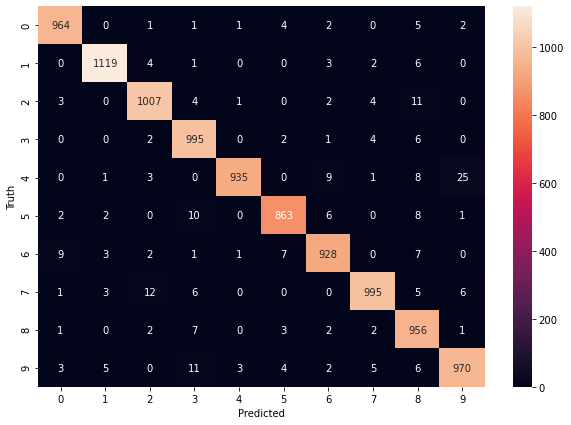

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2908 - accuracy: 0.9186
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1323 - accuracy: 0.9614
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0945 - accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0737 - accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0597 - accuracy: 0.9820
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9872
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9909
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.025

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9758


[0.08849569410085678, 0.9757999777793884]